In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

## O arquivo sofreu as seguintes modificações
* Ele foi salvo novamente como utf-8 e renomeado para pesquisa.csv
* Todos os e-mails foram removidos
* Existiam 3 e-mails duplicados, a primeira ocorrência foi removido de forma manual

In [2]:
df = pd.read_csv("pesquisa.csv")

In [3]:
df.head()

,Carimbo de data/hora,Nome de usuário,Qual tipo de curso você está fazendo?,Em qual escola você estuda?,Você mora na mesma cidade da escola que você estuda?,Você tinha dificuldades para ir à sua escola antes da Pandemia?,Qual modalidade de ensino você está cursando durante a Pandemia?,"Quando você ficou sabendo que teria ensino remoto, você já tinha ouvido falar nele anteriormente?",Quais eram suas expectativas?,"Agora que você está vivenciando o ensino remoto, o que você está achando?",...,"Quando você ficou sabendo que teria ensino EAD, você já tinha ouvido falar nele anteriormente?",Quais eram suas expectativas?.1,"Agora que você está vivenciando o ensino EAD, o que você está achando?",Quais tecnologias você usa para seus estudos EAD?,Você está sentindo dificuldades em utilizar estas tecnologias?,Quais são os desafios do ensino EAD para você?,Você está tendo algum problema de saúde por causa do tempo maior em frente ao computador ou celular?.1,Você acredita que o ensino EAD está no mesmo nível do ensino presencial?,Você gostaria de continuar utilizando essa tecnologia mesmo após a Pandemia?.1,"Entre ensino EAD e o ensino Presencial, qual você prefere?"
0,2020/05/14 7:57:21 PM GMT-3,NaN,Curso Superior,Fatec,Sim,Não tenho dificuldade,Ensino Remoto,Não,Achei que seria Ruim,Estou achando bom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/05/14 8:23:46 PM GMT-3,NaN,Curso Superior,Fatec,Sim,Não tenho dificuldade,Ensino Remoto,Talvez,Achava que seria bom,Estou achando bom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/05/14 8:39:31 PM GMT-3,NaN,Curso Superior,Fatec,Sim,Não tenho dificuldade,Ensino Remoto,Sim,Eu achava que seria horrível,Estou achando Ruim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/05/14 8:42:46 PM GMT-3,NaN,Curso Superior,Fatec,Sim,Não tenho dificuldade,Ensino Remoto,Talvez,Eu achava que seria horrível,Eu não sei o que pensar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/05/14 8:49:55 PM GMT-3,NaN,Curso Superior,Fatec,Não,Dependo de transporte gratuito,Ensino Remoto,Não,Eu não sabia o que pensar,Estou achando bom,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Perguntas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 27 columns):
Carimbo de data/hora                                                                                      53 non-null object
Nome de usuário                                                                                           0 non-null float64
Qual tipo de curso você está fazendo?                                                                     53 non-null object
Em qual escola você estuda?                                                                               53 non-null object
Você mora na mesma cidade da escola que você estuda?                                                      53 non-null object
Você tinha dificuldades para ir à sua escola antes da Pandemia?                                           53 non-null object
Qual modalidade de ensino você está cursando durante a Pandemia?                                          53 non-null object
Quando você ficou sabe

# Conhecendo as pessoas

Nessa etapa da pesquisa vamos listar os dados e depois as conclusões a respeito das pessoas

# Escolas envolvidas na pesquisa

In [5]:
# Escala do gráfico
plt.rcParams['figure.figsize'] = [16, 8]

In [6]:
def plotar_grafico_pizza(pergunta, df, cores = ["#ef476f","#f78c6b","#ffd166","#06d6a0","#118ab2", "#073b4c"], fg="#444444"):
    plt.pie(
        df[pergunta].value_counts(),
        labels=df[pergunta].unique(),
        autopct='%1.1f%%',
        colors = cores,
        textprops = {'fontsize': 14, "color":fg},
        shadow=True )

    plt.title(pergunta, fontsize=14, ha='center')
    plt.gca().set_aspect("equal")

In [7]:
def obtencao_valores_multiplos(pergunta, dataframe, identificador_extra_1=";"):

    # Estraindo subitens.
    # Os dados não estão em porcentagem de 0 a 100, algumas pessoas respoderam mais de uma alternativa
    nova_lista = []
    for item in list(dataframe[pergunta]):

        # Se tiver mais de um valor
        if ';' in item or identificador_extra_1 in item:
        
            if identificador_extra_1 in item:
                lista_temp = item.split(identificador_extra_1)
            else:        
                # Obtenha o segundo valor
                lista_temp = item.split(";")
        
            # Loop por todos os sub_itens
            for item_temp in lista_temp:
                nova_lista.append(item_temp)

        else: # Se não
         
            # Se o item não estiver na lista
            nova_lista.append(item)

    return nova_lista

Text(0.5,1,'Em qual escola você estuda?')

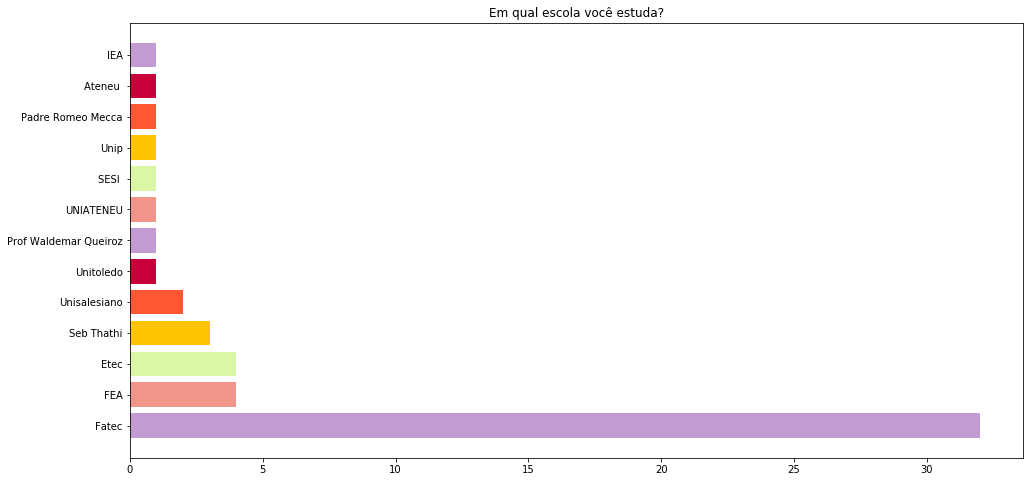

In [8]:
# Plotagem
plt.barh(df["Em qual escola você estuda?"].unique(),
        df["Em qual escola você estuda?"].value_counts(),
        color =["#c39bd3", "#f1948a", "#DAF7A6", "#FFC300", "#FF5733", "#C70039"])

plt.title("Em qual escola você estuda?")

### Qual tipo de curso você está fazendo?

In [9]:
df["Qual tipo de curso você está fazendo?"].value_counts()

Curso Superior                    44
Ensino Médio                       4
Curso Técnico                      3
Auxiliar técnico em enfermagem     1
Curso pré-vestibular               1
Name: Qual tipo de curso você está fazendo?, dtype: int64

### Você mora na mesma cidade da escola que você estuda?

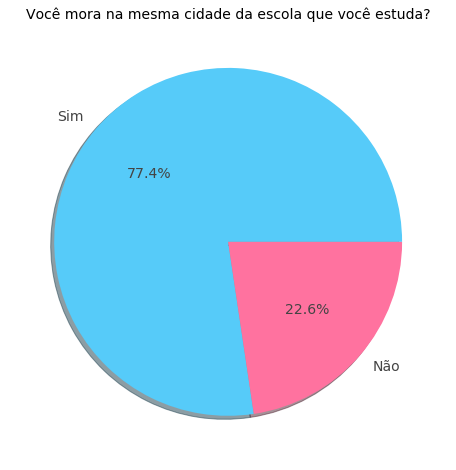

In [10]:
plotar_grafico_pizza("Você mora na mesma cidade da escola que você estuda?", df, cores= ["#56cbf9", "#ff729f"], fg="#444444")

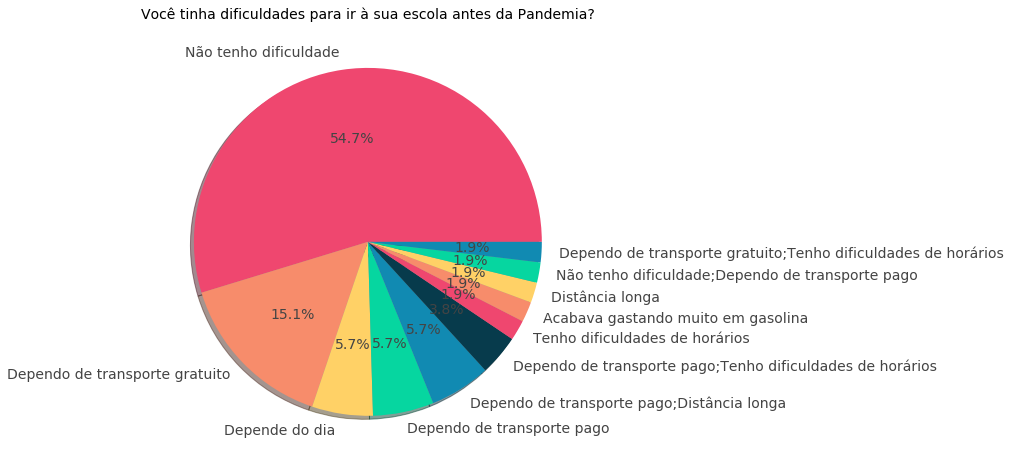

In [11]:
plotar_grafico_pizza("Você tinha dificuldades para ir à sua escola antes da Pandemia?", df)

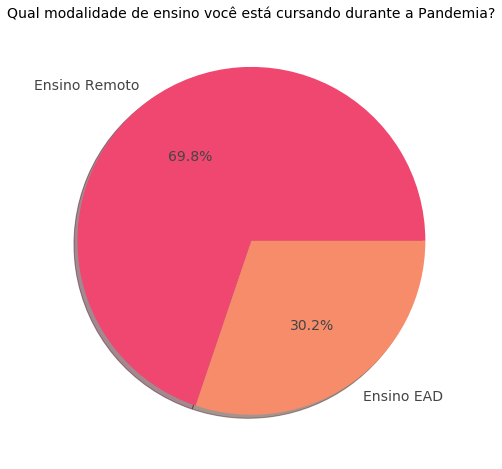

In [12]:
plotar_grafico_pizza("Qual modalidade de ensino você está cursando durante a Pandemia?", df)

-------------------------

# Ensino remoto

In [13]:
# Obtendo apenas respostas sobre o ensino remoto
df_ensino_remoto = df[ (df["Qual modalidade de ensino você está cursando durante a Pandemia?"] == "Ensino Remoto") ]

### Quando você ficou sabendo que teria ensino remoto, você já tinha ouvido falar nele anteriormente?

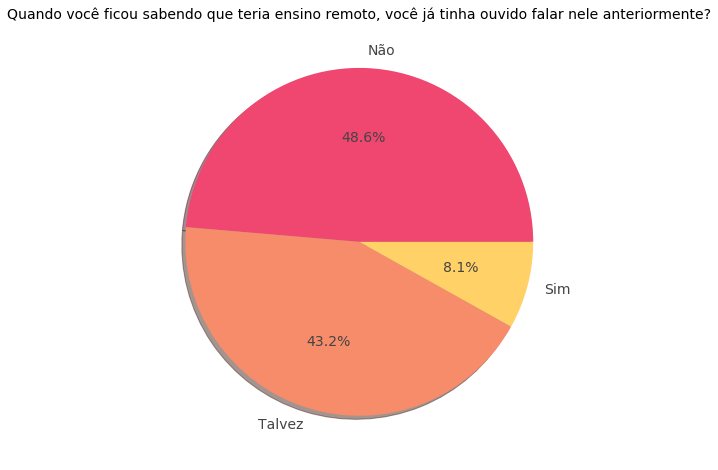

In [14]:
plotar_grafico_pizza("Quando você ficou sabendo que teria ensino remoto, você já tinha ouvido falar nele anteriormente?",df_ensino_remoto)

### Quais eram suas expectativas?

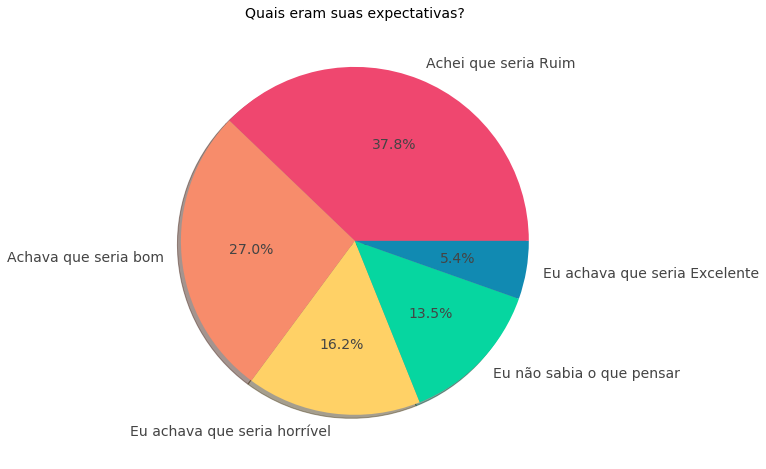

In [15]:
plotar_grafico_pizza("Quais eram suas expectativas?",df_ensino_remoto)

### Agora que você está vivenciando o ensino remoto, o que você está achando?

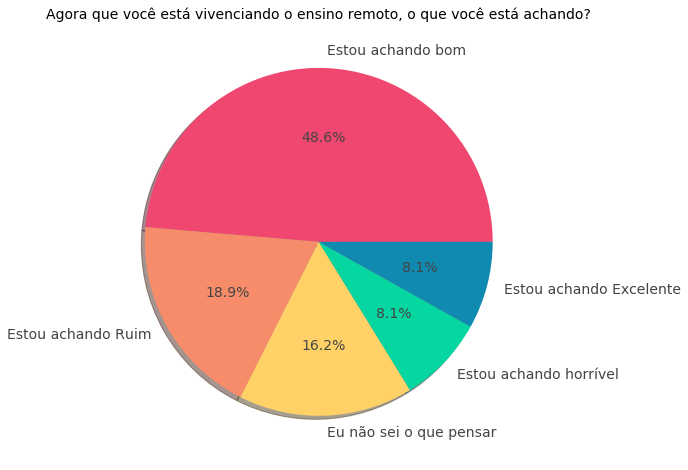

In [16]:
plotar_grafico_pizza("Agora que você está vivenciando o ensino remoto, o que você está achando?",df_ensino_remoto)

### Você está sentindo dificuldades em utilizar a tecnologias?

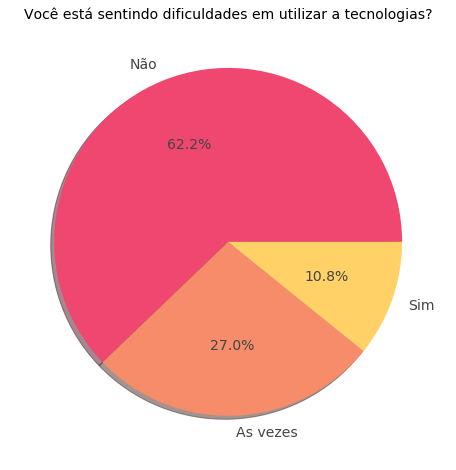

In [17]:
plotar_grafico_pizza("Você está sentindo dificuldades em utilizar a tecnologias?",df_ensino_remoto)

### Entre ensino Remoto e ensino Presencial, qual você prefere?

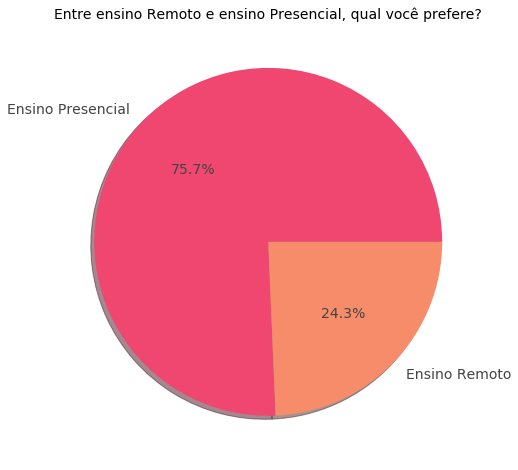

In [18]:
plotar_grafico_pizza("Entre ensino Remoto e ensino Presencial, qual você prefere?",df_ensino_remoto)

### Quais são os desafios do ensino remoto para você?

In [19]:
# Dados
df_ensino_remoto["Quais são os desafios do ensino remoto para você?"].unique()

array(['Não consigo ter foco em casa', 'Não consigo me adaptar',
       'Não consigo ter foco em casa;Não consigo me adaptar a esse modelo de ensino;Não generalizando mas alguns professores a aula piorou se comparado a antes da Pandemia, algumas aulas alguns Professores deixam mais dinâmica pois é do estilo deles serem assim. Deste modo a balança pesa para os dois lados (Aulas produtivas/legais e Aulas não produtivas/e chatas) quando ao quesito ensino/professor.',
       'Meu computador não é bom o suficiente para acompanhar as aulas e fazer as atividades',
       'Não consigo ter foco em casa;Não consigo me adaptar a esse modelo de ensino',
       ' Ter todos em casa.', 'Consegui superar os desafios',
       'Os professores não estão se adaptando',
       'Não tenho computador para assistir e praticar as aulas',
       'Minha internet não é boa;Meu computador não é bom o suficiente para acompanhar as aulas e fazer as atividades',
       'Não consigo ter foco em casa;Não consigo me ada

In [20]:
# Separando os dados dentro de cada linha
nova_lista = obtencao_valores_multiplos("Quais são os desafios do ensino remoto para você?", df_ensino_remoto)

In [21]:
# Transformando os dados deixando com menos opções para a plotagem dos gráficos.
lista_transformação1 = ['Professores nao esclarecem o que realmente deve ser feito e qual o prazo a ser realizados ', 'Não generalizando mas alguns professores a aula piorou se comparado a antes da Pandemia, algumas aulas alguns Professores deixam mais dinâmica pois é do estilo deles serem assim. Deste modo a balança pesa para os dois lados (Aulas produtivas/legais e Aulas não produtivas/e chatas) quando ao quesito ensino/professor.' ]
lista_transformação2 = ['Não há desafio, apenas auto-disciplina.', 'Não tenho']
lista_transformação3 = ['Não consigo me adaptar', 'Tem disciplinas que não consigo acompanhar.']
lista_transformação4 = [' Ter todos em casa.']
lista_formatada = []

for valor in nova_lista:
    if valor in lista_transformação1:
        lista_formatada.append("Os professores não estão se adaptando"); continue

    if valor in lista_transformação2:
        lista_formatada.append("Consegui superar os desafios"); continue

    if valor in lista_transformação3:
        lista_formatada.append('Não consigo me adaptar a esse modelo de ensino'); continue

    if valor in lista_transformação4:
        lista_formatada.append('Não consigo ter foco em casa'); continue
        
    lista_formatada.append(valor)

# Criando um dataframe com os dados tratados
df_desafios_formatados = pd.DataFrame(lista_formatada, columns=["Desafio"])

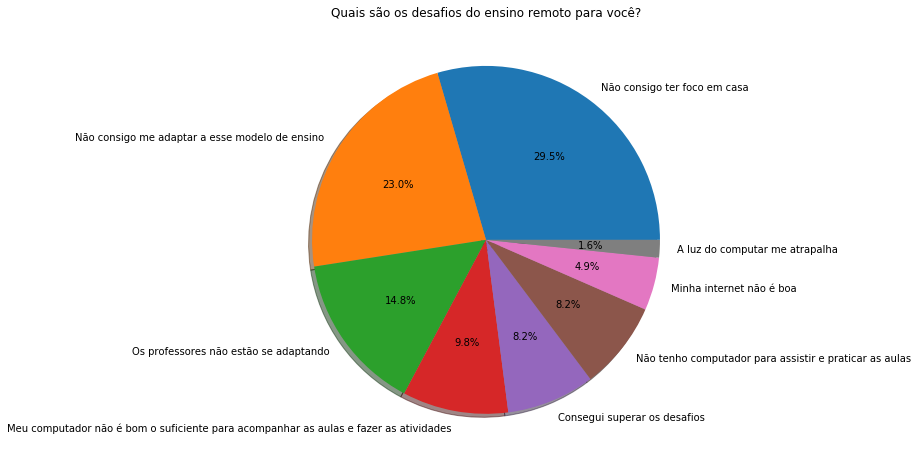

In [22]:
# Plotagem
plt.pie(df_desafios_formatados["Desafio"].value_counts(),
        labels=df_desafios_formatados["Desafio"].unique(),
        autopct='%1.1f%%',
        shadow=True )

plt.title("Quais são os desafios do ensino remoto para você?")
plt.gca().set_aspect("equal")

--------------------------------------------------------------------------------------------------------------
### <span style="color:blue">Quais tecnologias você usar para estudar remotamente?</style>

In [23]:
nova_lista = obtencao_valores_multiplos("Quais tecnologias você usar para estudar remotamente?", df_ensino_remoto, identificador_extra_1=' e ')

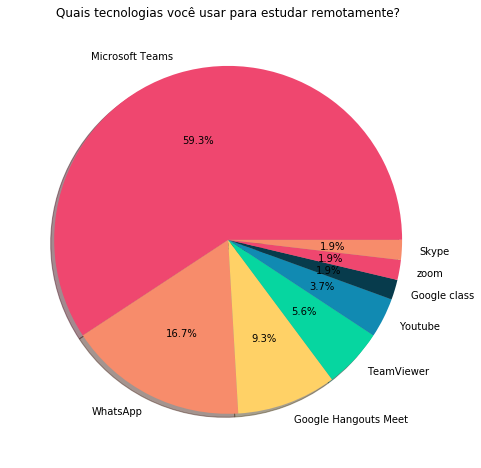

In [24]:
df_plataformas_remoto = pd.DataFrame(nova_lista, columns=["Plataforma"])
df_plataformas_remoto["Plataforma"].unique()

# Plotagem
plt.pie(df_plataformas_remoto["Plataforma"].value_counts(),
        labels=df_plataformas_remoto["Plataforma"].unique(),
        autopct='%1.1f%%',
        shadow=True,
       colors= ["#ef476f","#f78c6b","#ffd166","#06d6a0","#118ab2", "#073b4c"])

plt.title("Quais tecnologias você usar para estudar remotamente?")
plt.gca().set_aspect("equal")

### Você gostaria de continuar utilizando essa tecnologia mesmo após a Pandemia?

In [25]:
nova_lista = list(df_ensino_remoto["Você gostaria de continuar utilizando essa tecnologia mesmo após a Pandemia?"])

# Transformando os dados deixando com menos opções para a plotagem dos gráficos.
lista_transformação1 = ['Em pasres está sendo melhor pois os professores estão conseguindo aproveitar mais pois nao ha interrupções como em sala de aula']
lista_transformação2 = ['Ela facilita o trabalho em grupo, estudo entre amigos e esclarecimento de dúvidas.']
lista_formatada = []

for valor in nova_lista:
    if valor in lista_transformação1:
        lista_formatada.append('Tem menos interrupções na sala'); continue

    if valor in lista_transformação2:
        lista_formatada.append('Facilita o trabalho em grupo e esclarecimento'); continue

    lista_formatada.append(valor)

# Criando um dataframe com os dados tratados
df_continuar_usando_remoto = pd.DataFrame(lista_formatada, columns=["ContinuarUsando"])
df_continuar_usando_remoto["ContinuarUsando"].value_counts()

Sim                                              13
Não                                              11
Apenas para complemento nos estudos               7
Talvez                                            4
Tem menos interrupções na sala                    1
Facilita o trabalho em grupo e esclarecimento     1
Name: ContinuarUsando, dtype: int64

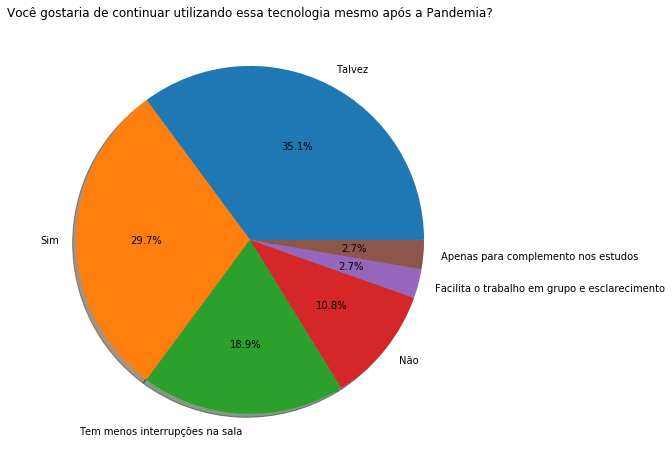

In [26]:
df_continuar_usando_remoto = pd.DataFrame(lista_formatada, columns=["ContinuarUsando"])
df_continuar_usando_remoto["ContinuarUsando"].unique()

# Plotagem
plt.pie(df_continuar_usando_remoto["ContinuarUsando"].value_counts(),
        labels=df_continuar_usando_remoto["ContinuarUsando"].unique(),
        autopct='%1.1f%%',
        shadow=True )

plt.title("Você gostaria de continuar utilizando essa tecnologia mesmo após a Pandemia?")
plt.gca().set_aspect("equal")

### Você acredita que o ensino remoto está no mesmo nível do ensino presencial?

In [27]:
nova_lista = list(df_ensino_remoto["Você acredita que o ensino remoto está no mesmo nível do ensino presencial?"])
nova_lista

# Transformando os dados deixando com menos opções para a plotagem dos gráficos.
lista_transformação1 = ['Tem suas vantagens e desvantagens no período ao qual vivemos agora, porém eu acredito estar mais fraco do que o presencial o ritmo está um pouco mais lento e travado devido as diversas condições de alunos.', 'Não, porque presencialmente os professores conseguem atender uma quantidade maior de alunos e ensino remoto acaba sendo limitado a apenas 1 por vez']
lista_transformação2 = ['É muito melhor o remoto', 'em algumas matérias sim mas em outras tem seu rendimento maior', 'As vezes está até melhor'
'Sim, ou até melhor.']
lista_transformação3 = ['Falta convivência com as pessoas']
lista_formatada = []


for valor in nova_lista:
    if valor in lista_transformação1:
        lista_formatada.append('Não'); continue

    if valor in lista_transformação2:
        lista_formatada.append('Sim, ou até melhor.'); continue

    if valor in lista_transformação3:
        lista_formatada.append('Depende'); continue


    lista_formatada.append(valor)

# Criando um dataframe com os dados tratados
df_continuar_usando_remoto = pd.DataFrame(lista_formatada, columns=["mesmoNivel"])
df_continuar_usando_remoto["mesmoNivel"].value_counts()

Não                         20
Sim                         11
Sim, ou até melhor.          3
Depende                      2
As vezes está até melhor     1
Name: mesmoNivel, dtype: int64

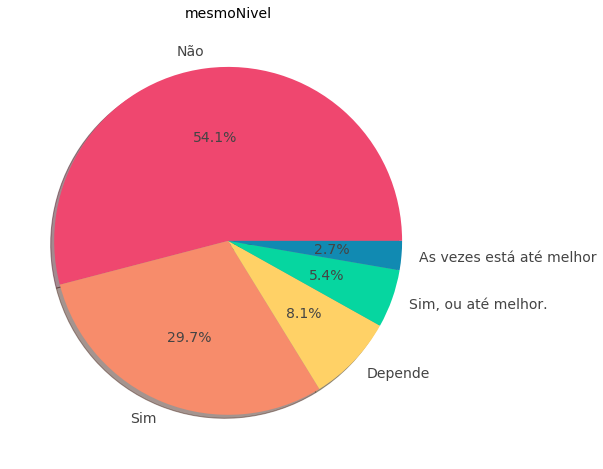

In [28]:
plotar_grafico_pizza("mesmoNivel",df_continuar_usando_remoto)

### Você está tendo algum problema de saúde por causa do tempo maior em frente ao computador ou celular?

In [29]:
# Separando os dados dentro de cada linha
nova_lista = obtencao_valores_multiplos("Você está tendo algum problema de saúde por causa do tempo maior em frente ao computador ou celular?", df_ensino_remoto)

df_problemas_saude = pd.DataFrame(nova_lista, columns=["Pes"])
lista_problemas_saude = list(  df_problemas_saude["Pes"]  )

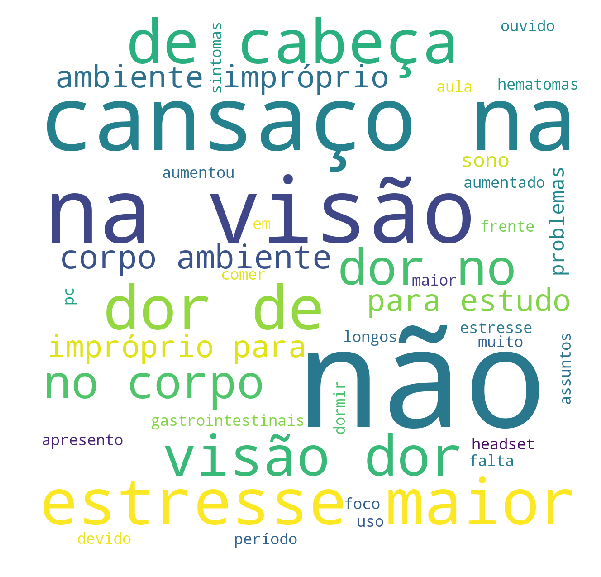

In [30]:
string = ""
for x in lista_problemas_saude:
    string += " " + str(x)

for x in ["Estou com","por causa de","Estou com","Por causa do", "um ", "tem", "ao", "que", "também"]:
    string = string.replace(x, "")

comment_words = string.lower()

stopwords = set(STOPWORDS) 
  
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Ensino EAD

In [31]:
# Obtendo apenas respostas sobre o ensino remoto
df_ensino_ead = df[ (df["Qual modalidade de ensino você está cursando durante a Pandemia?"] == "Ensino EAD") ]

### Quando você ficou sabendo que teria ensino EAD, você já tinha ouvido falar nele anteriormente?

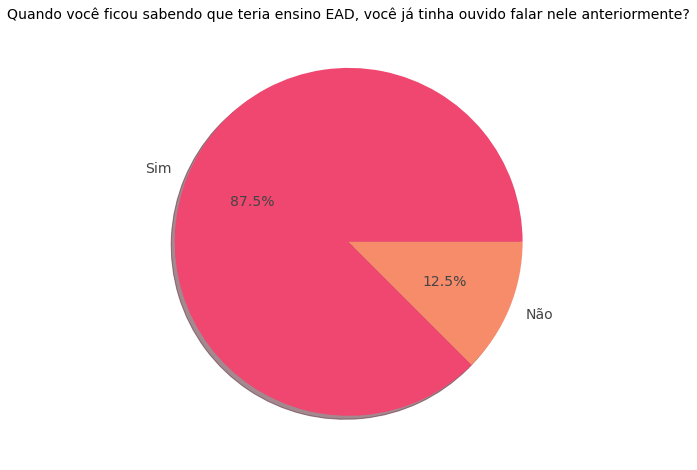

In [32]:
plotar_grafico_pizza("Quando você ficou sabendo que teria ensino EAD, você já tinha ouvido falar nele anteriormente?",df_ensino_ead)

### Quais eram suas expectativas?

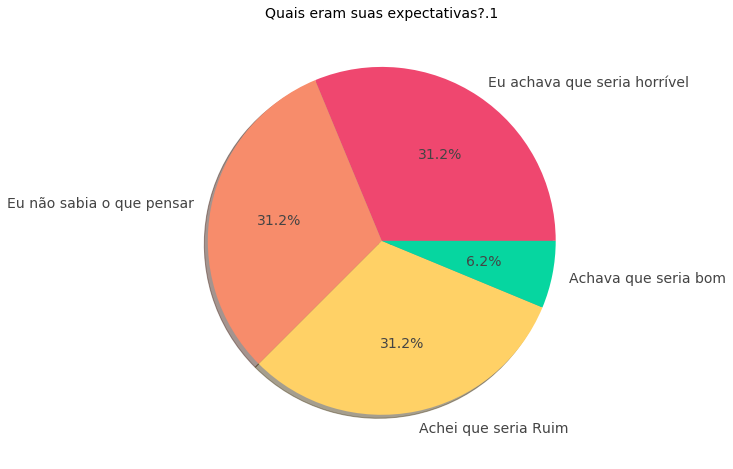

In [33]:
plotar_grafico_pizza("Quais eram suas expectativas?.1",df_ensino_ead, fg="#444444")

### Agora que você está vivenciando o ensino EAD, o que você está achando?

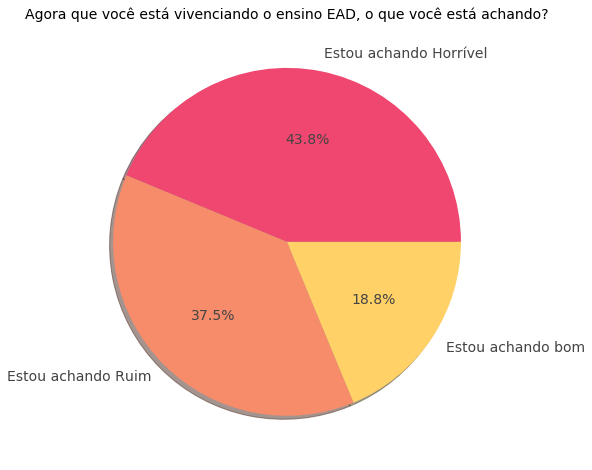

In [34]:
plotar_grafico_pizza("Agora que você está vivenciando o ensino EAD, o que você está achando?",df_ensino_ead)

### Você está sentindo dificuldades em utilizar a tecnologias?

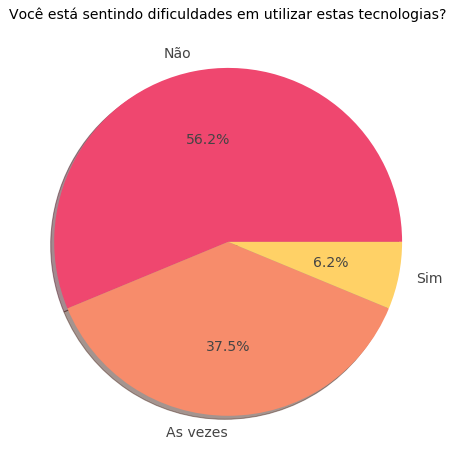

In [35]:
plotar_grafico_pizza("Você está sentindo dificuldades em utilizar estas tecnologias?",df_ensino_ead)

### Entre ensino EAD e o ensino Presencial, qual você prefere?

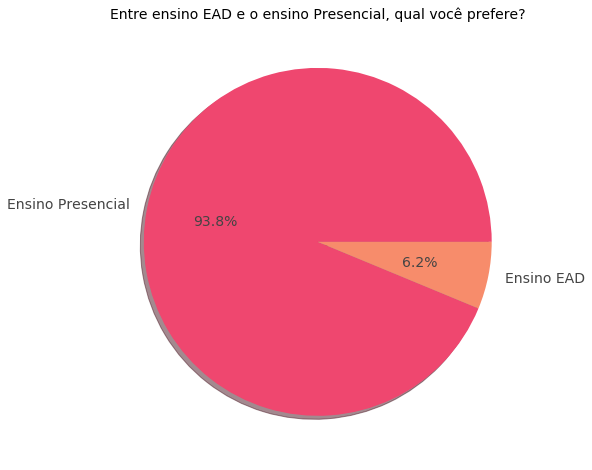

In [36]:
plotar_grafico_pizza("Entre ensino EAD e o ensino Presencial, qual você prefere?",df_ensino_ead)

### <span style="color:red">Trabalhando com dados pouco estruturados</span>

### Quais são os desafios do ensino EAD para você?

In [37]:
# Dados
df_ensino_ead["Quais são os desafios do ensino EAD para você?"].unique()

array(['Não consigo ter foco em casa;Não consigo me adaptar;Não consigo me adaptar a esse modelo de ensino',
       'Não consigo ter foco em casa;Não consigo me adaptar a esse modelo de ensino',
       'Não consigo me adaptar a esse modelo de ensino',
       'Consegui superar os desafios',
       'Meu computador não é bom o suficiente para acompanhar as aulas e fazer as atividades;Não consigo ter foco em casa;Não consigo me adaptar',
       'Consegui superar os desafios;Minha internet não é boa;Meu computador não é bom o suficiente para acompanhar as aulas e fazer as atividades;Não consigo ter foco em casa',
       'Não consigo ter foco em casa',
       'Meu computador não é bom o suficiente para acompanhar as aulas e fazer as atividades;Não consigo ter foco em casa;Não consigo me adaptar;Não consigo me adaptar a esse modelo de ensino'],
      dtype=object)

In [38]:
# Separando os dados dentro de cada linha
nova_lista = obtencao_valores_multiplos("Quais são os desafios do ensino EAD para você?", df_ensino_ead)

In [39]:
# Criando um dataframe com os dados tratados
df_desafios_formatados = pd.DataFrame(nova_lista, columns=["Desafio"])

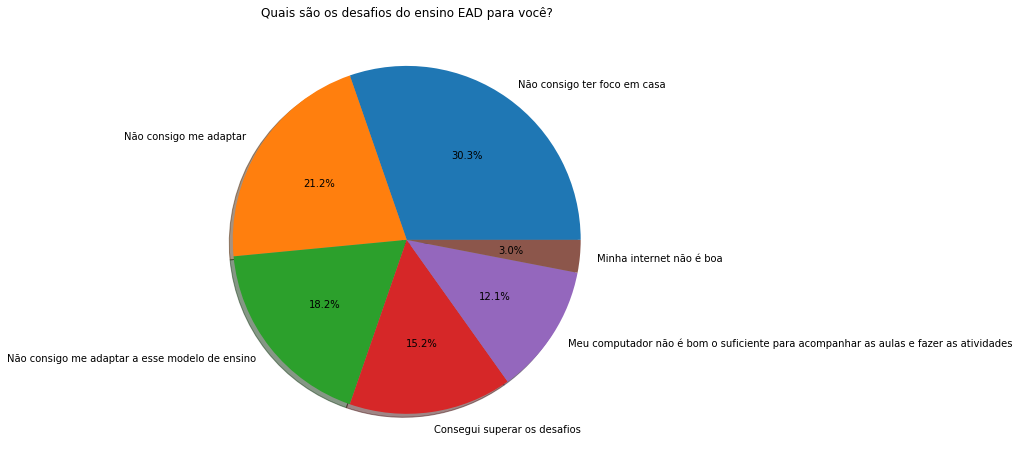

In [40]:
# Plotagem
plt.pie(df_desafios_formatados["Desafio"].value_counts(),
        labels=df_desafios_formatados["Desafio"].unique(),
        autopct='%1.1f%%',
        shadow=True )

plt.title("Quais são os desafios do ensino EAD para você?")
plt.gca().set_aspect("equal")

--------------------------------------------------------------------------------------------------------------
### <span style="color:blue">Quais tecnologias você usa para seus estudos EAD?</style>

In [41]:
nova_lista = obtencao_valores_multiplos("Quais tecnologias você usa para seus estudos EAD?", df_ensino_ead)

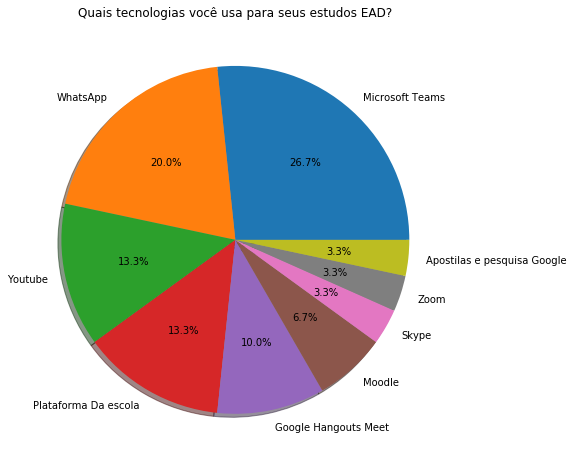

In [42]:
df_plataformas_ead = pd.DataFrame(nova_lista, columns=["Plataforma"])
df_plataformas_ead["Plataforma"].unique()

# Plotagem
plt.pie(df_plataformas_ead["Plataforma"].value_counts(),
        labels=df_plataformas_ead["Plataforma"].unique(),
        autopct='%1.1f%%',
        shadow=True )

plt.title("Quais tecnologias você usa para seus estudos EAD?")
plt.gca().set_aspect("equal")

### Você gostaria de continuar utilizando essa tecnologia mesmo após a Pandemia?.1

In [43]:
nova_lista = list(df_ensino_ead["Você gostaria de continuar utilizando essa tecnologia mesmo após a Pandemia?.1"])

lista_transformação1 = ['Apenas para complementos no estudo']
lista_formatada = []

for valor in nova_lista:
    if valor in lista_transformação1:
        lista_formatada.append('Apenas para complemento nos estudos'); continue
    lista_formatada.append(valor)


# Criando um dataframe com os dados tratados
df_continuar_usando_ead = pd.DataFrame(lista_formatada, columns=["ContinuarUsando"])
df_continuar_usando_ead["ContinuarUsando"].value_counts()

Não                                    11
Apenas para complemento nos estudos     3
Sim                                     2
Name: ContinuarUsando, dtype: int64

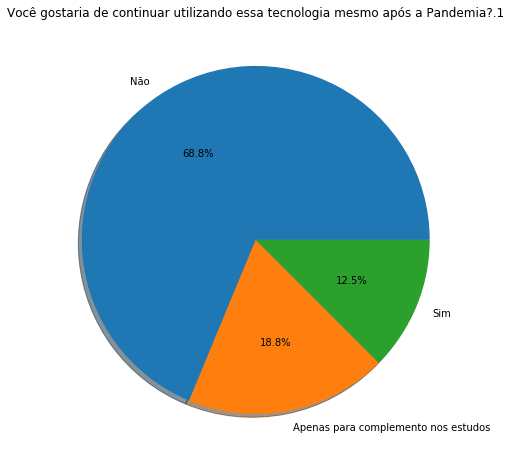

In [44]:
# Plotagem
plt.pie(df_continuar_usando_ead["ContinuarUsando"].value_counts(),
        labels=df_continuar_usando_ead["ContinuarUsando"].unique(),
        autopct='%1.1f%%',
        shadow=True )

plt.title("Você gostaria de continuar utilizando essa tecnologia mesmo após a Pandemia?.1")
plt.gca().set_aspect("equal")

### Você acredita que o ensino EAD está no mesmo nível do ensino presencial?

In [45]:
nova_lista = list(df_ensino_ead["Você acredita que o ensino EAD está no mesmo nível do ensino presencial?"])
nova_lista

# Transformando os dados deixando com menos opções para a plotagem dos gráficos.
lista_transformação1 = ['nem um pouco nem chega perto horrivel']
lista_formatada = []


for valor in nova_lista:
    if valor in lista_transformação1:
        lista_formatada.append('Não'); continue

    lista_formatada.append(valor)

# Criando um dataframe com os dados tratados
df_continuar_usando_ead = pd.DataFrame(lista_formatada, columns=["mesmoNivel"])
df_continuar_usando_ead["mesmoNivel"].value_counts()

Não    15
Sim     1
Name: mesmoNivel, dtype: int64

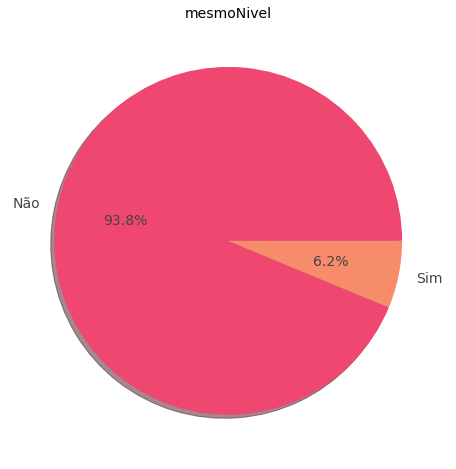

In [46]:
plotar_grafico_pizza("mesmoNivel",df_continuar_usando_ead)

### Você está tendo algum problema de saúde por causa do tempo maior em frente ao computador ou celular?

In [47]:
# Separando os dados dentro de cada linha
nova_lista = obtencao_valores_multiplos("Você está tendo algum problema de saúde por causa do tempo maior em frente ao computador ou celular?.1", df_ensino_ead)

df_problemas_saude = pd.DataFrame(nova_lista, columns=["Pes"])
lista_problemas_saude = list(  df_problemas_saude["Pes"]  )

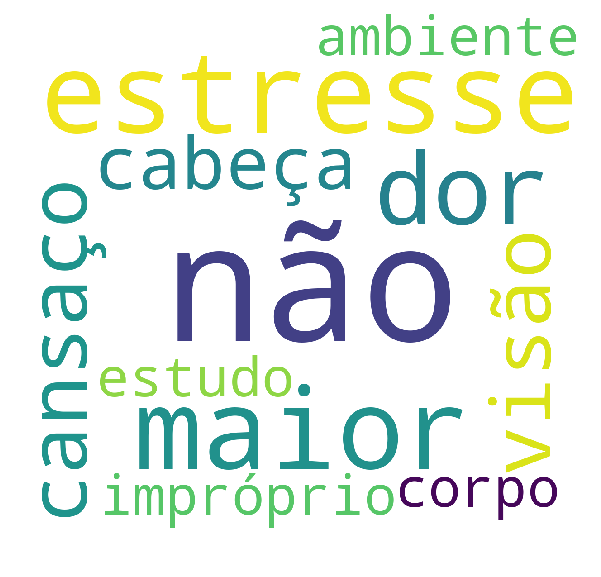

In [48]:
string = ""
for x in lista_problemas_saude:
    string += " " + str(x)

for x in ["Estou com","por causa de","Estou com","Por causa do", "um ", "tem", "ao", "que", "também", "na ", "para ", "de "]:
    string = string.replace(x, "")

comment_words = string.lower()

stopwords = set(STOPWORDS) 
  
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

---------------------------------------------------------------------------------------------------
# Obtendo dados especificos
---------------------------------------------------------------------------------------------------

### Das pessoas que moram fora da cidade onde estudam, elas tinham boas espectativas?

In [49]:
# Pessoas que moram na mesma cidade
df_mora_mesma_cidade = df[ (df["Você mora na mesma cidade da escola que você estuda?"] == "Sim") ]
df_mora_outra_cidade = df[ (df["Você mora na mesma cidade da escola que você estuda?"] == "Não") ]

lista_mora_mesma_cidade = list(df_mora_mesma_cidade["Quais eram suas expectativas?"].dropna()) +list( df_mora_mesma_cidade["Quais eram suas expectativas?.1"].dropna() )
lista_mora_outra_cidade = list(df_mora_outra_cidade["Quais eram suas expectativas?"].dropna()) +list( df_mora_outra_cidade["Quais eram suas expectativas?.1"].dropna() )

In [50]:
df_mora_mesma_cidade_espectativas = pd.DataFrame(lista_mora_mesma_cidade, columns=["Espectativas"])
df_mora_mesma_cidade_espectativas["Espectativas"].value_counts()

Eu não sabia o que pensar        15
Eu achava que seria horrível     11
Achei que seria Ruim              7
Achava que seria bom              7
Eu achava que seria Excelente     1
Name: Espectativas, dtype: int64

In [51]:
df_mora_outra_cidade_espectativas = pd.DataFrame(lista_mora_outra_cidade, columns=["Espectativas"])
df_mora_outra_cidade_espectativas["Espectativas"].value_counts()

Eu não sabia o que pensar        4
Eu achava que seria horrível     4
Achei que seria Ruim             3
Eu achava que seria Excelente    1
Name: Espectativas, dtype: int64

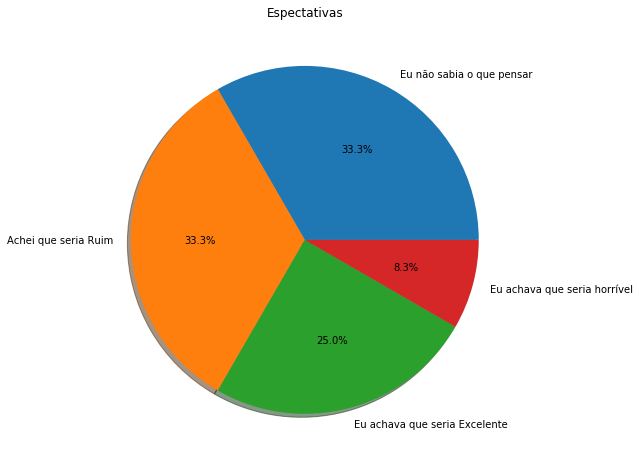

In [52]:
ax1 = plt.pie(
    df_mora_outra_cidade_espectativas["Espectativas"].value_counts(),
    labels=df_mora_outra_cidade_espectativas["Espectativas"].unique(),
    autopct='%1.1f%%',
    shadow=True )

plt.title("Espectativas")
plt.gca().set_aspect("equal")
